In [1]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/CS182/CS\ 182\ Final\ Project/Model

/content/drive/.shortcut-targets-by-id/1hzhdcGA40OipfzF0SRT7omKvzCSi0q4r/CS 182 Final Project/Model


In [8]:
train_losses = []
train_epochs = []
val_losses = []

def get_path(path):
  path += "/results/runs"
  i = os.listdir(path)[0]
  j = os.listdir(path + "/" + i)[0]
  return path + "/" + i + "/" + j

def plot_loss(exp_names, file_paths, train, val):
  for exp_name, file_path in zip(exp_names, file_paths):
    train_losses = []
    train_epochs = []
    val_losses = []
    for summary in summary_iterator(get_path(file_path)):
        for v in summary.summary.value:
          if v.tag == "train/loss":
            train_losses.append(v.simple_value)
          elif v.tag == "eval/loss":
            val_losses.append(v.simple_value)
          elif v.tag == "train/epoch":
            train_epochs.append(v.simple_value)

    train_losses = np.array(train_losses)
    val_losses =  np.array(val_losses)
    train_epochs = np.array(train_epochs)

    if train:
      plt.plot(train_epochs[::2][:-1], train_losses, label=exp_name)
    if val:
      plt.plot(train_epochs[::2][:-1], val_losses, label=exp_name)
    # display(pd.DataFrame({"train_losses": train_losses, "val_losses": val_losses}))

  plt.xlabel("Training epochs")
  plt.ylabel("Negative Log Likelihood")
  # plt.title("Llama 3B w/ LoRA Validation Loss (alpha=16)")
  plt.legend()
  # plt.show()

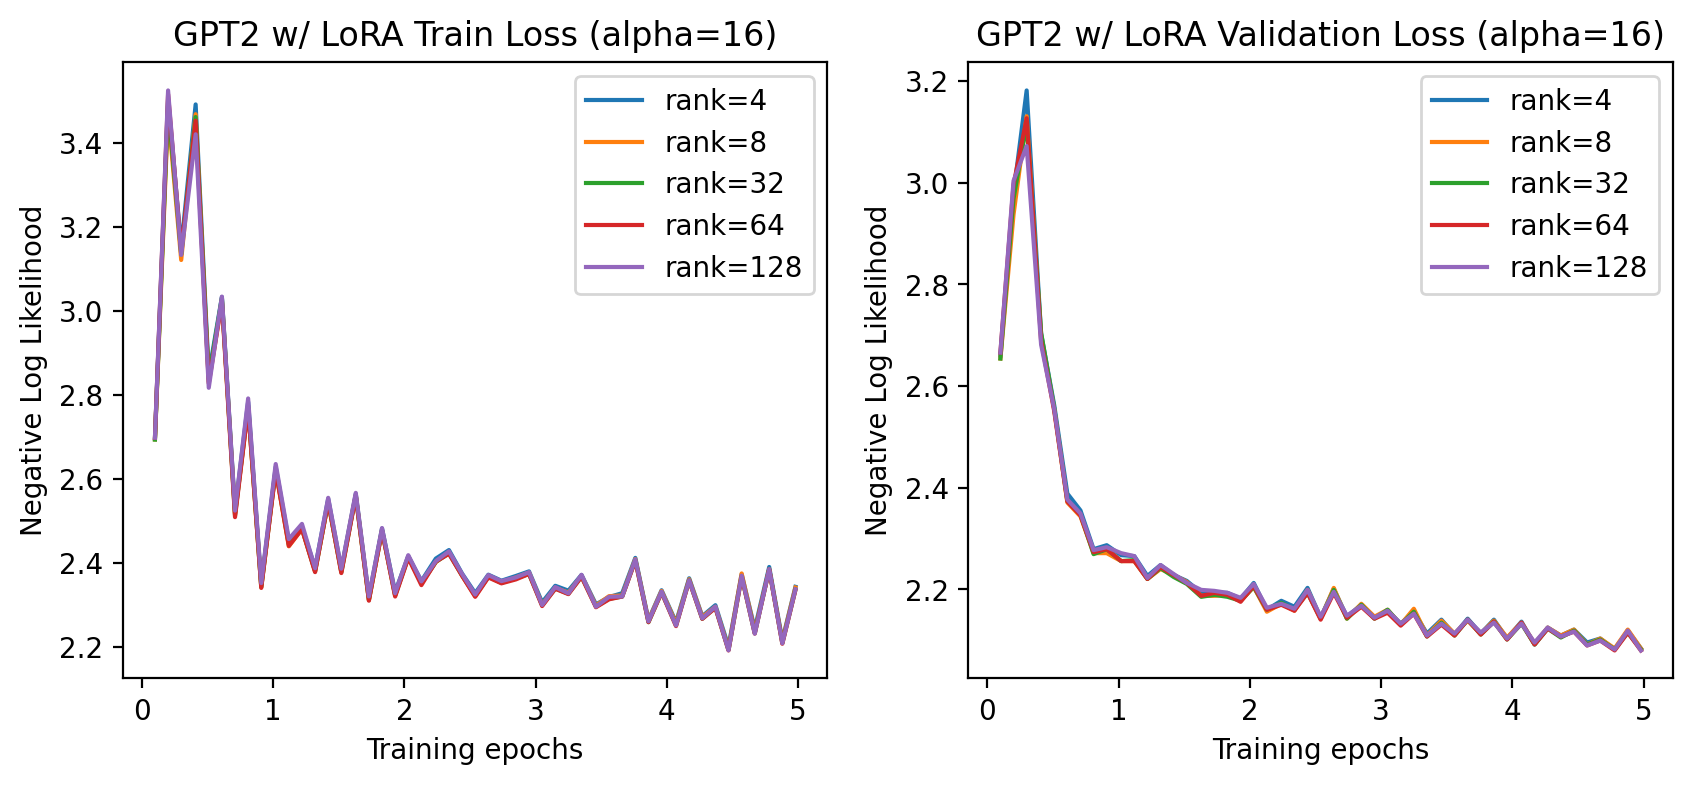

In [ ]:
exp_names = ["rank=4", "rank=8", "rank=32", "rank=64", "rank=128", "rank=256"]
file_paths = ["./Geovanni/gpt2_lora_r4_a16_lr2e-4", "./Geovanni/gpt2_lora_r8_a16_lr2e-4", "./Geovanni/gpt2_lora_r32_a16_lr2e-4", "./Geovanni/gpt2_lora_r64_a16_lr2e-4", "./Geovanni/gpt2_lora_r128_a16_lr2e-4"]

plt.figure(figsize=(10, 4), dpi=200)
plt.subplot(1, 2, 1)
plt.title("GPT2 w/ LoRA Train Loss (alpha=16)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
plot_loss(exp_names, file_paths, train=True, val=False)

plt.subplot(1, 2, 2)
plt.title("GPT2 w/ LoRA Validation Loss (alpha=16)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
plot_loss(exp_names, file_paths, train=False, val=True)

plt.show()

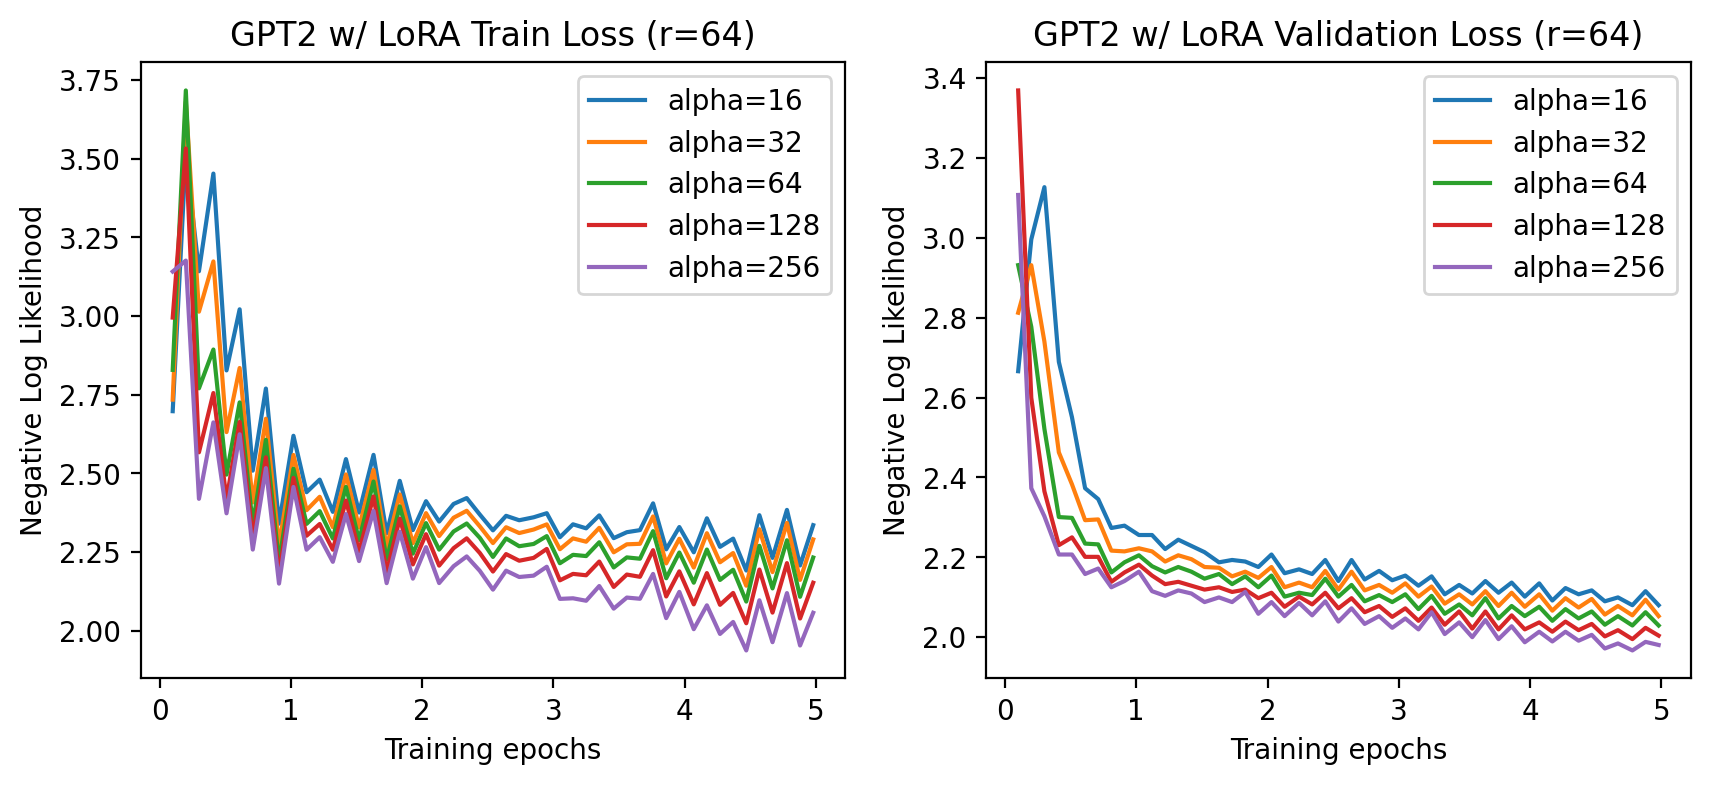

In [ ]:
plt.figure(figsize=(10, 4), dpi=200)
plt.subplot(1, 2, 1)
plt.title("GPT2 w/ LoRA Train Loss (r=64)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
plot_loss(exp_names, alpha_paths, train=True, val=False)

plt.subplot(1, 2, 2)
plt.title("GPT2 w/ LoRA Validation Loss (r=64)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
plot_loss(exp_names, alpha_paths, train=False, val=True)

plt.show()

In [13]:
!ls

 182proj.ipynb		     inference-llama.ipynb   mir		   Untitled0.ipynb
'Copy of 182proj.ipynb'      LoRA.ipynb		    'results (1).gsheet'   wandb
 Geovanni		     LoRA_Llama.ipynb	     results.csv
 inference-gpt2-lora.ipynb   Milad		     results.gsheet


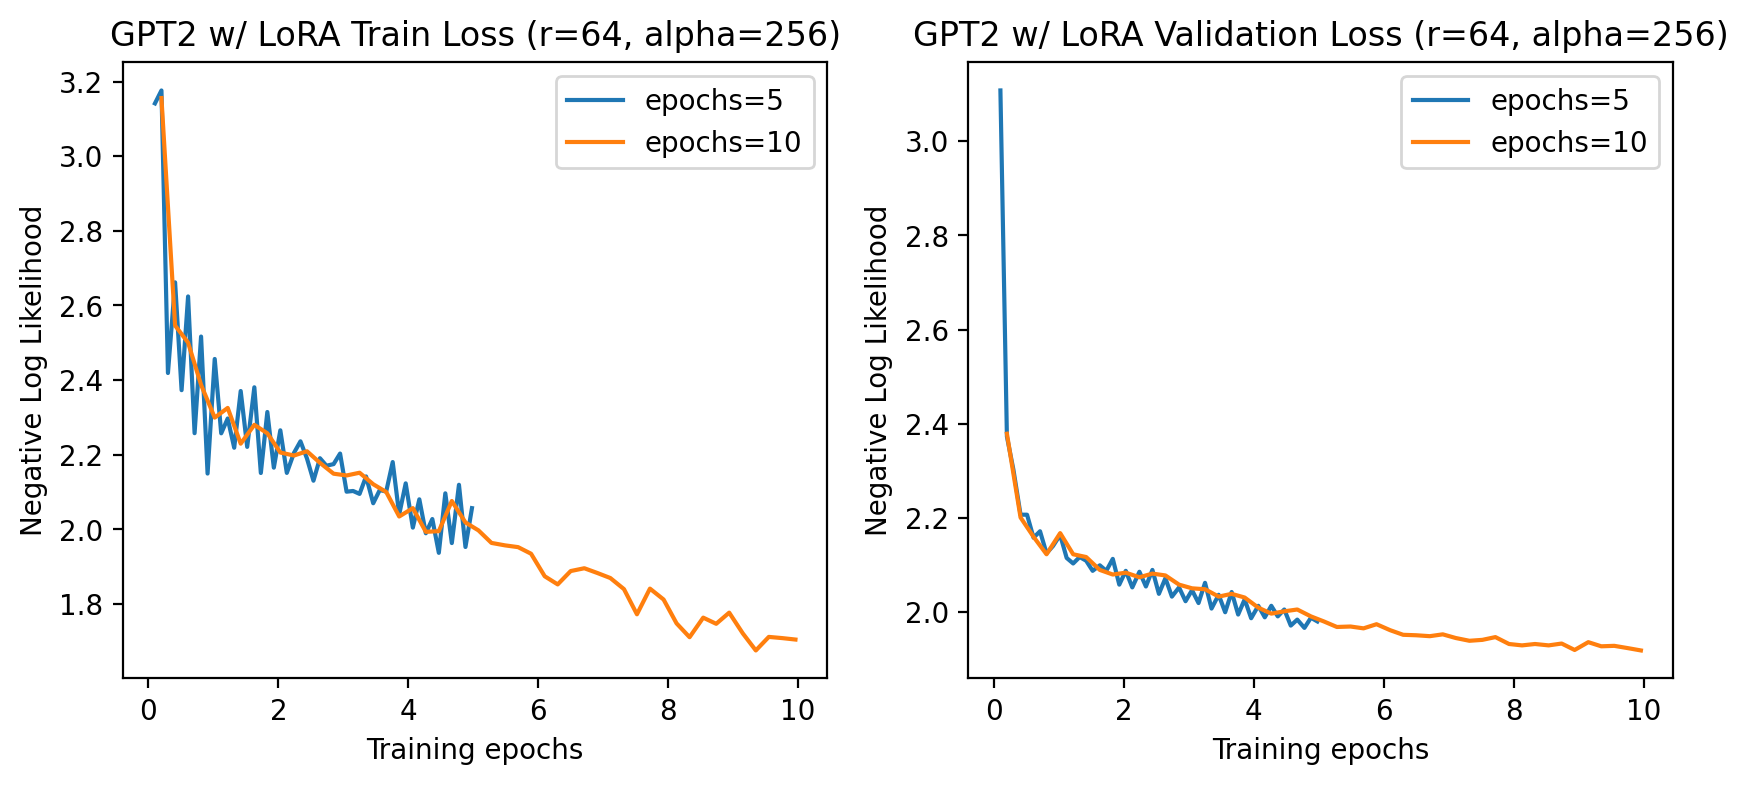

In [14]:
alpha_paths = ["./Geovanni/gpt2_lora_r64_a16_lr2e-4", "./Geovanni/gpt2_lora_r64_a32_lr2e-4", "./Geovanni/gpt2_lora_r64_a64_lr2e-4", "./Geovanni/gpt2_lora_r64_a128_lr2e-4", "./Geovanni/gpt2_lora_r64_a256_lr2e-4"]
exp_names = ["alpha=16", "alpha=32", "alpha=64", "alpha=128", "alpha=256"]

plt.figure(figsize=(10, 4), dpi=200)
plt.subplot(1, 2, 1)
plt.title("GPT2 w/ LoRA Train Loss (r=64, alpha=256)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
plot_loss(exp_names, best_paths, train=True, val=False)

plt.subplot(1, 2, 2)
plt.title("GPT2 w/ LoRA Validation Loss (r=64, alpha=256)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
plot_loss(exp_names, best_paths, train=False, val=True)

plt.show()

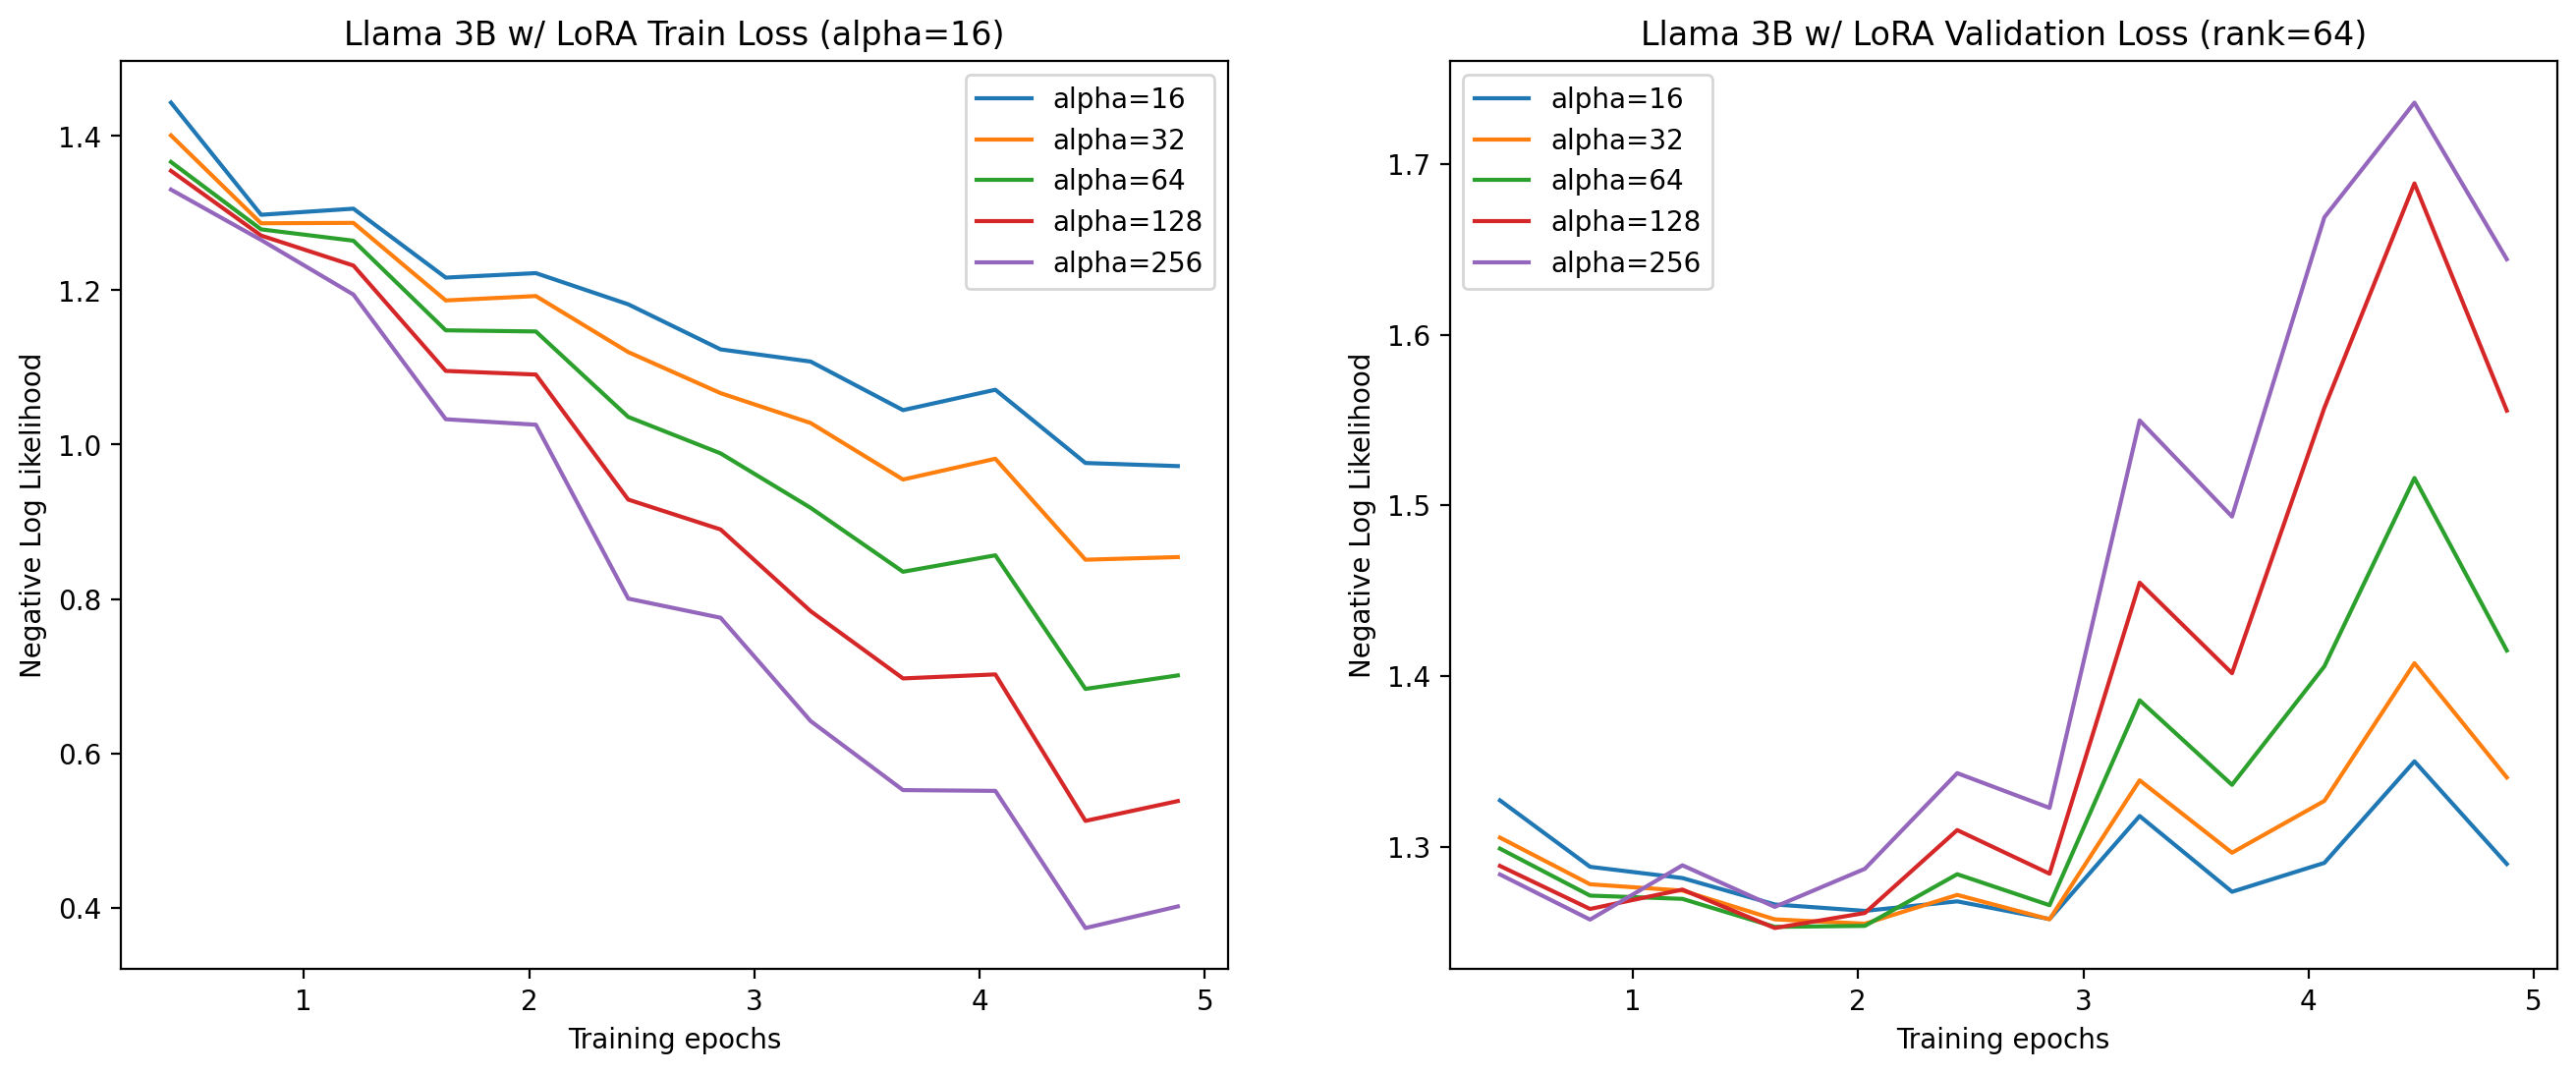

In [10]:
exp_names = ["rank=4", "rank=8", "rank=32", "rank=64", "rank=128", "rank=256"]
file_paths = ["./mir/llama_lora_r4_a16", "./mir/llama_lora_r8_a16", "./mir/llama_lora_r32_a16", "./mir/llama_lora_r64_a16", "./mir/llama_lora_r128_a16", "./mir/llama_lora_r256_a16"]

plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(1, 2, 1)
plt.title("Llama 3B w/ LoRA Train Loss (alpha=16)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
plot_loss(exp_names, file_paths, train=True, val=False)

plt.subplot(1, 2, 2)
plt.title("Llama 3B w/ LoRA Validation Loss (alpha=16)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
plot_loss(exp_names, file_paths, train=False, val=True)

plt.show()

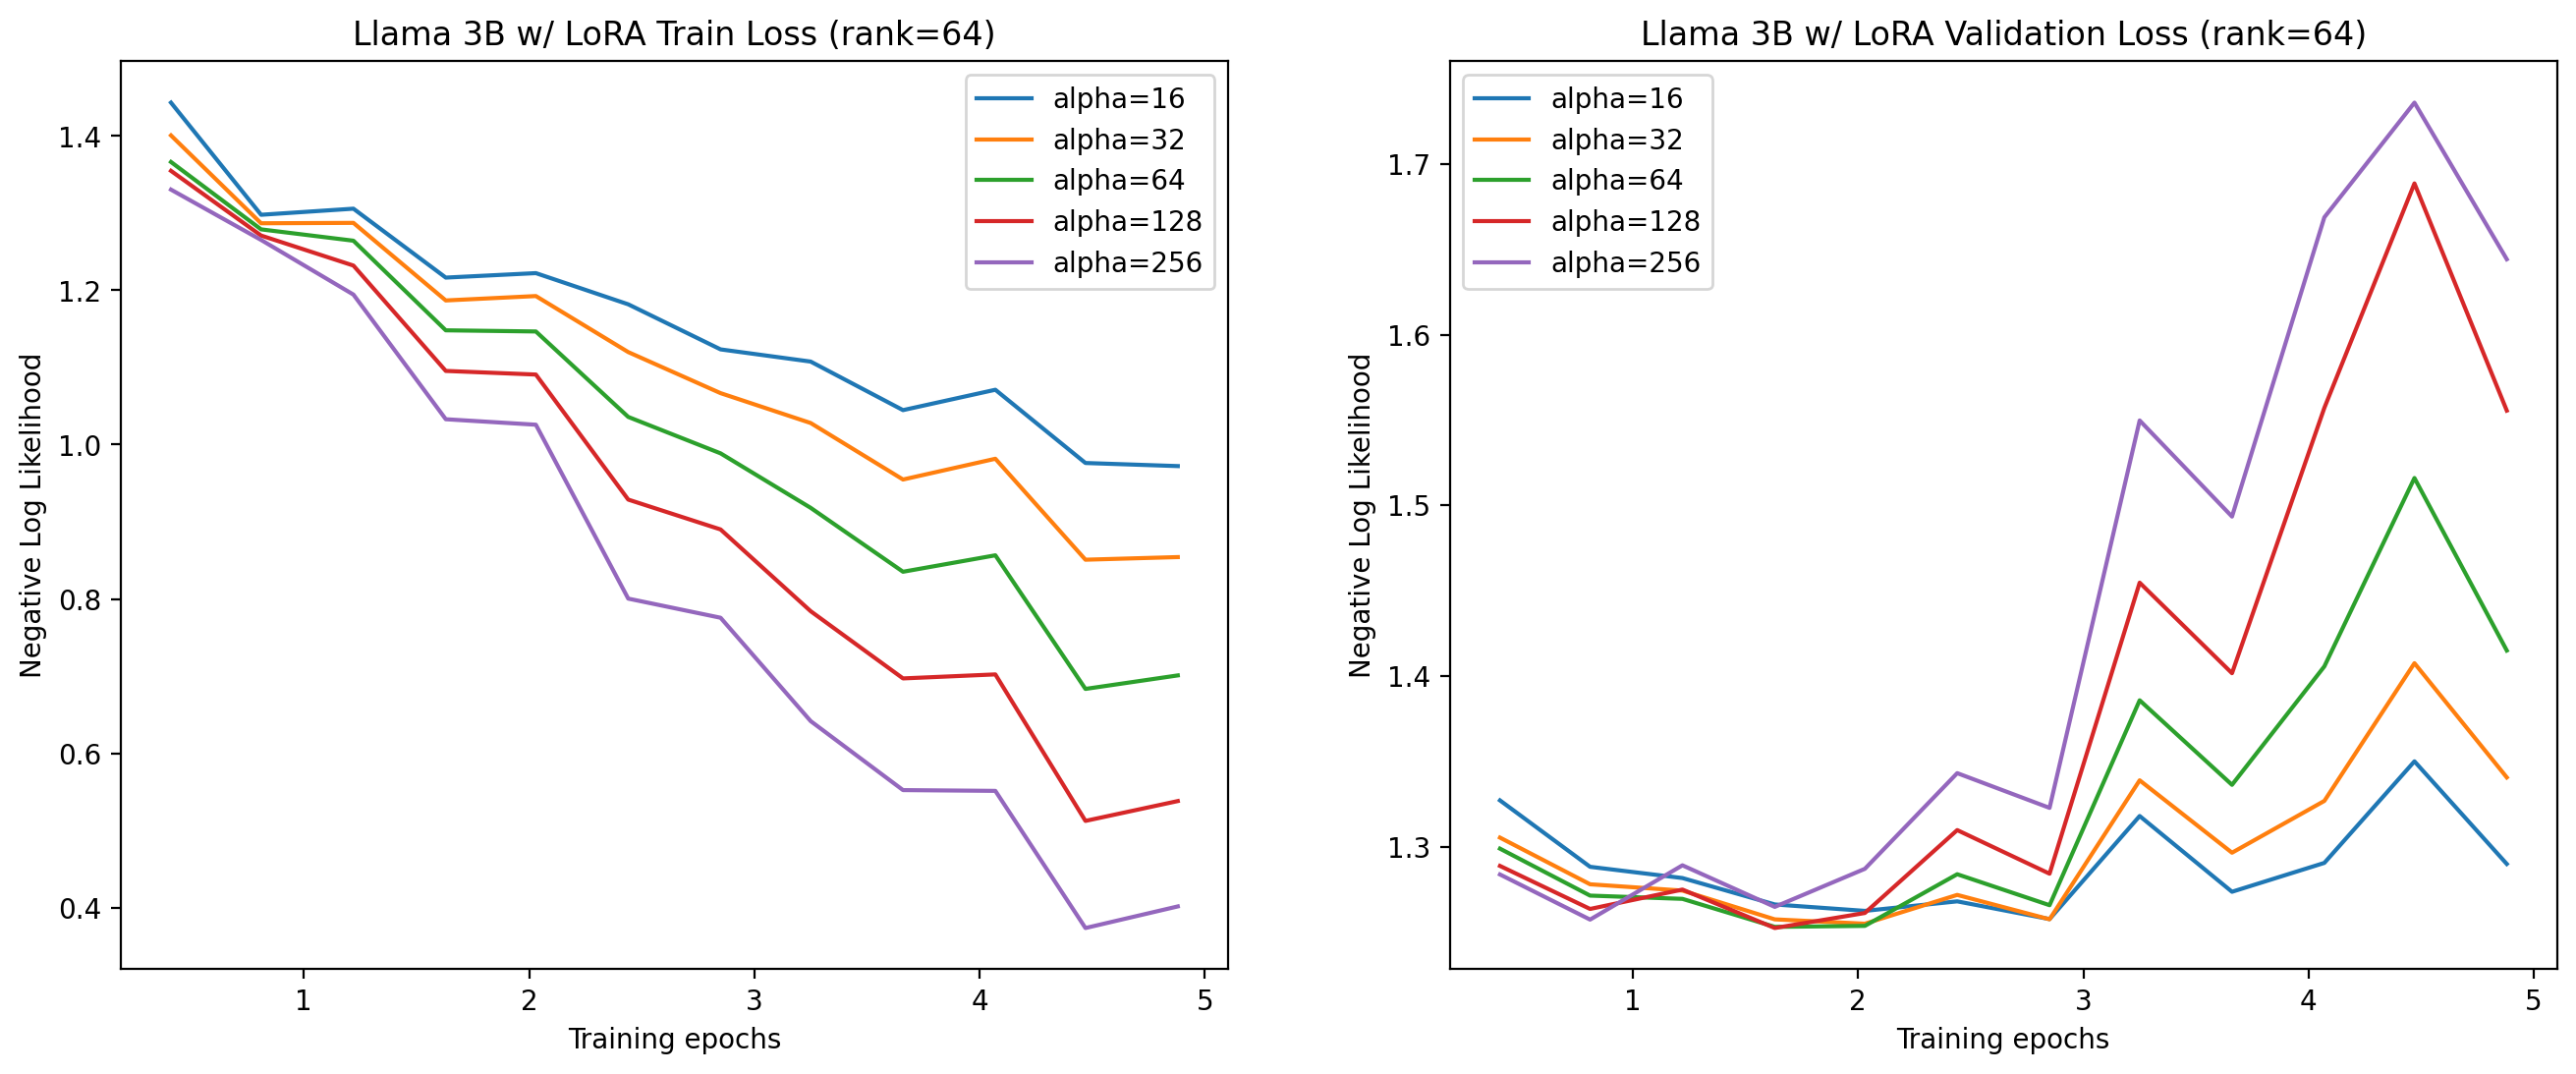

In [12]:
exp_names = ["alpha=16", "alpha=32", "alpha=64", "alpha=128", "alpha=256"]
file_paths = ["./mir/llama_lora_r64_a16", "./mir/llama_lora_r64_a32", "./mir/llama_lora_r64_a64", "./mir/llama_lora_r64_a128", "./mir/llama_lora_r64_a256"]

plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(1, 2, 1)
plt.title("Llama 3B w/ LoRA Train Loss (rank=64)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
plot_loss(exp_names, file_paths, train=True, val=False)

plt.subplot(1, 2, 2)
plt.title("Llama 3B w/ LoRA Validation Loss (rank=64)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
plot_loss(exp_names, file_paths, train=False, val=True)

plt.show()